In [38]:
## Importing the libraries

import pandas as pd
from sklearn.linear_model import LinearRegression

# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# Loading the Training Data and using the Training Data to build the Model

In [41]:
df_train = pd.read_csv('/Users/bhavanakajal/Python Learning/Hackathons/Hakathon-1/Train_dataset.csv')
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [42]:
## Checking for the null values

df_train.isnull().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

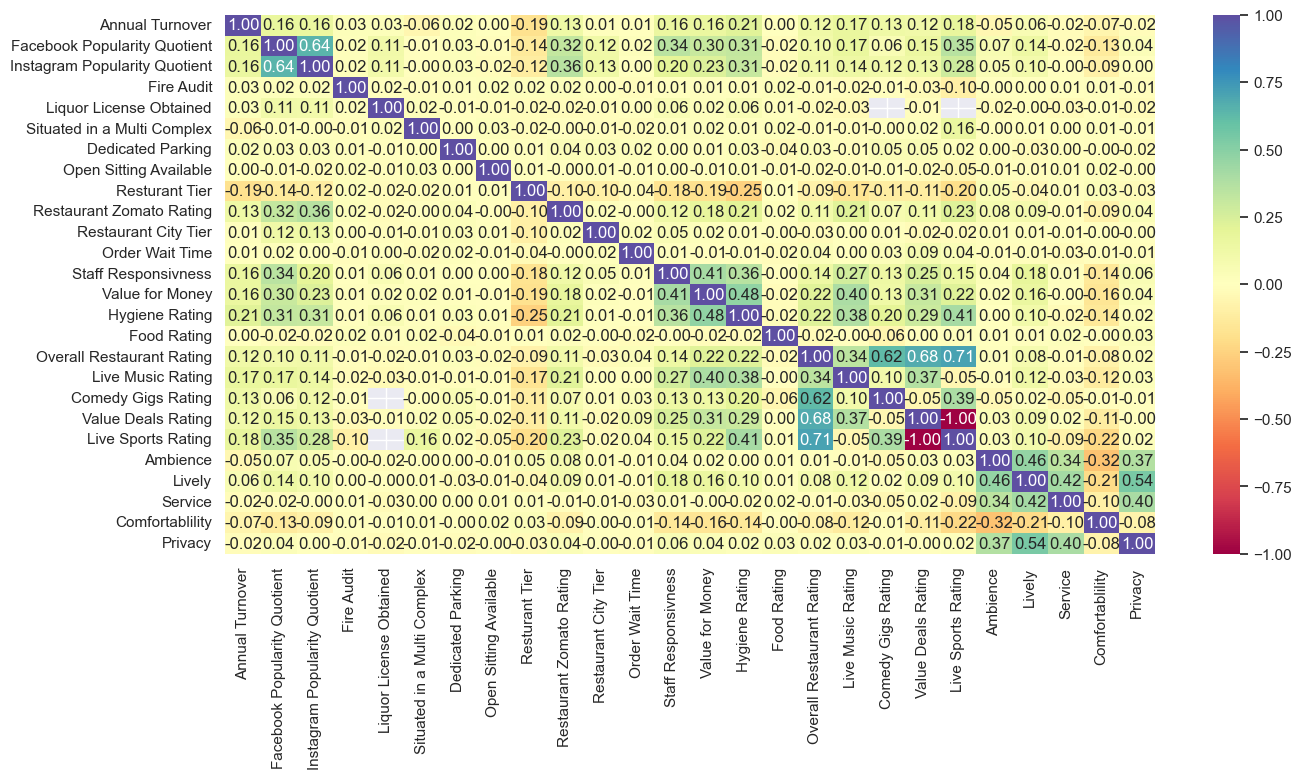

In [43]:
cols_list = df_train.select_dtypes(include=np.number).columns.tolist()
# dropping Year as it is a temporal variable
cols_list.remove("Registration Number")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df_train[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [44]:
## Importing Simple Imputer to treat the null values

from sklearn.impute import SimpleImputer

In [7]:
## Defning the Simple Imputer funtion to use 'mean' as a strategy of imputation

SI = SimpleImputer(strategy='mean')

In [8]:
## Fitting the Simple Imputer function to get the mean of the variable

SI.fit(df_train[['Instagram Popularity Quotient']])

SimpleImputer()

In [9]:
## Transforming the variable --> Imputing the variable with its mean

IPQ = SI.transform(df_train[['Instagram Popularity Quotient']])
IPQ

array([[95.8],
       [85. ],
       [68.2],
       ...,
       [86.8],
       [86. ],
       [67. ]])

In [10]:
## Declaring the Linear Regression function

LR = LinearRegression()

In [11]:
## Fitting the Linear Regression function

model = LR.fit(IPQ,df_train['Annual Turnover'])

In [12]:
## Checking the score of the function on the training data

model.score(IPQ,df_train['Annual Turnover'])

0.026482712263984687

# Loading the Test Data and using the Test Data to Predict the target Variable

In [14]:
df_test = pd.read_csv('Test_dataset.csv')
df_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [15]:
## Checking for the null values

df_test.isnull().sum()

Registration Number                0
Cuisine                            0
City                               0
Restaurant Location                0
Opening Day of Restaurant          0
Facebook Popularity Quotient       0
Endoresed By                       0
Instagram Popularity Quotient      0
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     0
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating         34
Live Music Rating                102
Comedy Gigs Rating               370
Value Deals Rating               385
L

In [16]:
## Using the model built on the Training set to predict on the Test Set

prediction = model.predict(df_test[['Instagram Popularity Quotient']])
prediction

/Users/bhavanakajal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([28970960.71768262, 37737095.60304943, 34490378.9788395 ,
       30724187.69475599, 34639727.94355316, 25759957.976339  ,
       23906082.78391513, 27347602.40557766, 31243662.35462957,
       27448250.62092816, 30399516.03233499, 33711166.98902912,
       35139722.30368149, 31081326.52341907, 29078102.36628155,
       27724221.53398601, 33776101.32151332, 27867077.06545124,
       34165707.31641851, 28191748.72787224, 28646289.05526163,
       33516363.99157652, 27996945.73041964, 27996945.73041964,
       31935212.99558628, 26308653.08583048, 36373474.62088126,
       35139722.30368149, 32996889.33170294, 35789065.62852347,
       27120332.24188296, 31243662.35462957, 36146204.45718656,
       36535810.45209175, 31243662.35462957, 22802199.13168375,
       32542349.00431354, 29490435.37755621, 28743690.55398792,
       24360623.11130452, 36730613.44954436, 27802142.73296705,
       29321606.11309729, 27802142.73296705, 35983868.62597607,
       31568334.01705056, 27672274.06799

# Saving the output in a data frame and then exporting it to a '.csv' file with the appropriate 'Registration Number'.

In [17]:
solution_df = pd.DataFrame(df_test['Registration Number'])
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [18]:
solution_df['Annual Turnover'] = prediction
solution_df

,Registration Number,Annual Turnover
0,20001,2.897096e+07
1,20002,3.773710e+07
2,20003,3.449038e+07
3,20004,3.072419e+07
4,20005,3.463973e+07
...,...,...
495,20496,2.994498e+07
496,20497,2.395478e+07
497,20498,2.975017e+07
498,20499,3.770463e+07


In [29]:
## Setting the directory to export the file as a '.csv'

import os
cwd = os.getcwd()
print(cwd)
os.chdir('/Users/bhavanakajal/Desktop/')

/Users/bhavanakajal/Python Learning/Hackathons/Hakathon-1


In [30]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df.to_csv('Submission.csv',index=False)

# END